In [1]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [2]:
import pandas as pd
import numpy as np
import os
import warnings
warnings.filterwarnings('ignore')

In [3]:
os.chdir('/home/externalFolder/demo_final_item/919_gene_exp_data')
wd = os.getcwd()

In [4]:
csv_list=[]
for root,dirs,files in os.walk(wd):
    for file in files:
        if os.path.splitext(file)[1]==".csv":
            csv_list.append(file)

In [5]:
df=pd.read_csv(csv_list[0],header=0,encoding="utf8")

In [6]:
for csv in csv_list[1:]:
    df_next=pd.read_csv(csv,header=0,encoding="utf8")
    df=df.append(df_next)

In [7]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,92,93,94,95,96,97,98,99,geneid,liver
0,1.761442,2.790810,2.190633,1.366542,1.210230,4.333073,0.000000,5.413660,1.837925,1.930477,...,3.758223,3.474159,3.496822,4.054275,2.381885,1.270377,1.025855,0.297131,19_ENSG00000186111,3.7475
1,1.211720,0.000000,2.633885,0.000000,2.164730,3.018419,0.000000,2.417155,3.599522,1.559915,...,5.318622,2.664386,1.946143,5.270920,2.632094,1.098805,2.410668,3.541078,19_ENSG00000105392,0.0000
2,5.675832,4.745682,3.559182,2.595683,3.789395,3.378824,2.903236,0.579252,2.732789,2.377489,...,0.818733,3.818157,4.024894,2.365818,2.681749,1.881388,0.957109,2.936124,19_ENSG00000198482,7.0200
3,1.769291,0.000000,2.971827,0.656363,2.821765,3.035915,1.449824,2.394194,2.491104,0.072874,...,2.086079,1.530210,0.253707,1.894978,1.696856,2.115879,2.373876,3.595030,19_ENSG00000213023,0.0025
4,2.576891,5.813239,0.162564,6.722833,3.257501,7.277939,2.003305,5.161095,2.128146,0.937664,...,3.160046,7.496635,2.092992,7.658709,3.668366,2.345745,4.955628,4.108473,19_ENSG00000131408,24.0775


In [8]:
df=df.values

array([[1.7614421000000002, 2.79081, 2.1906333, ..., 0.29713124,
        '19_ENSG00000186111', 3.7475],
       [1.2117196000000001, 0.0, 2.6338851, ..., 3.5410776,
        '19_ENSG00000105392', 0.0],
       [5.6758323, 4.7456822, 3.559182, ..., 2.9361243,
        '19_ENSG00000198482', 7.02],
       ...,
       [0.6593685, 3.286777, 1.7489103, ..., 4.5012617,
        '12_ENSG00000256504', 0.0],
       [3.0667236, 2.8898243999999997, 2.3574387999999997, ...,
        1.6945603999999999, '12_ENSG00000151131', 2.77],
       [1.8548483, 2.0971587000000005, 0.96279025, ...,
        1.1288871999999999, '12_ENSG00000257470', 0.0]], dtype=object)

In [18]:
train_data=df[:,:100]

In [19]:
train_target=df[:,-1]

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
train_X,test_X,train_y,test_y = train_test_split(train_data,train_target,test_size=0.2,random_state=1) #随机种子用于复现结果

In [109]:
from keras import regularizers
from keras.layers import Dropout

In [119]:
model = Sequential([
    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(100,)),
    Dropout(0.3),
    Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='linear', kernel_regularizer=regularizers.l2(0.01)),
])

In [120]:
model.compile(optimizer='adam',loss='mse')

In [121]:
model.summary

<bound method Network.summary of <keras.engine.sequential.Sequential object at 0x7ff694242be0>>

In [123]:
history= model.fit(train_X, train_y,
          batch_size=32, epochs=100,
          validation_data=(test_X, test_y))

Train on 15537 samples, validate on 3885 samples
Epoch 1/100
15537/15537 [==============================] - 1s 96us/step - loss: 107640.1068 - val_loss: 201737.0214
Epoch 2/100
15537/15537 [==============================] - 2s 100us/step - loss: 106805.5443 - val_loss: 201947.3983
Epoch 3/100
15537/15537 [==============================] - 2s 97us/step - loss: 107132.7803 - val_loss: 202009.0717
Epoch 4/100
15537/15537 [==============================] - 2s 98us/step - loss: 106752.1780 - val_loss: 201781.2944
Epoch 5/100
15537/15537 [==============================] - 1s 96us/step - loss: 106307.1376 - val_loss: 202080.1864
Epoch 6/100
15537/15537 [==============================] - 2s 98us/step - loss: 105485.4967 - val_loss: 201841.5424
Epoch 7/100
15537/15537 [==============================] - 2s 97us/step - loss: 106442.1434 - val_loss: 201778.6640
Epoch 8/100
15537/15537 [==============================] - 2s 98us/step - loss: 105667.9981 - val_loss: 202123.6608
Epoch 9/100
15537/1553

15537/15537 [==============================] - 2s 97us/step - loss: 60519.1098 - val_loss: 203301.5612
Epoch 72/100
15537/15537 [==============================] - 1s 95us/step - loss: 57976.9222 - val_loss: 202249.8884
Epoch 73/100
15537/15537 [==============================] - 1s 95us/step - loss: 44529.8807 - val_loss: 212195.7106
Epoch 74/100
15537/15537 [==============================] - 1s 96us/step - loss: 39436.1200 - val_loss: 210815.5533
Epoch 75/100
15537/15537 [==============================] - 1s 96us/step - loss: 37333.8848 - val_loss: 203509.5485
Epoch 76/100
15537/15537 [==============================] - 1s 95us/step - loss: 60432.7079 - val_loss: 203185.1948
Epoch 77/100
15537/15537 [==============================] - 2s 99us/step - loss: 46966.0235 - val_loss: 201695.5677
Epoch 78/100
15537/15537 [==============================] - 1s 95us/step - loss: 45006.1567 - val_loss: 202121.6580
Epoch 79/100
15537/15537 [==============================] - 2s 98us/step - loss: 4686

In [124]:
import matplotlib.pyplot as plt

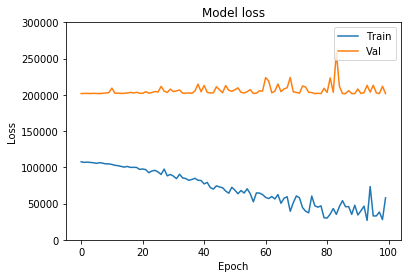

In [127]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=300000, bottom=0)
plt.show()